## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils.plot import *

## Load the dataset

In [2]:
# Load testing data
data = pd.read_csv('https://raw.githubusercontent.com/ktxdev/mind-matters/refs/heads/master/data/raw/train.csv')

## Initial Exploration
### Shape and Structure

In [3]:
print(data.shape)
data.head()

(140700, 20)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


### Dropping Unwanted Features
- **id:** This is just a unique identifier for each person in the dataset, which does not contribute to predicting mental health outcomes.
- **Name:** This feature is not relevant to predicting depression and could introduce noise i.e it does not provide meaningful information for the model

In [4]:
data.drop(columns=['id', 'Name'], inplace=True)

### Rename Columns

In [5]:
data.rename(columns={'Have you ever had suicidal thoughts ?': 'Had Suicidal Thoughts?'}, inplace=True)

### Data Types

In [6]:
data.dtypes

Gender                               object
Age                                 float64
City                                 object
Working Professional or Student      object
Profession                           object
Academic Pressure                   float64
Work Pressure                       float64
CGPA                                float64
Study Satisfaction                  float64
Job Satisfaction                    float64
Sleep Duration                       object
Dietary Habits                       object
Degree                               object
Had Suicidal Thoughts?               object
Work/Study Hours                    float64
Financial Stress                    float64
Family History of Mental Illness     object
Depression                            int64
dtype: object

### Data Types Conversion

In [7]:
data['Study Satisfaction'] = data['Study Satisfaction'].astype('category')
data['Job Satisfaction'] = data['Job Satisfaction'].astype('category')
data['Academic Pressure'] = data['Academic Pressure'].astype('category')
data['Work Pressure'] = data['Work Pressure'].astype('category')
data['Financial Stress'] = data['Financial Stress'].astype('category')
data['Work/Study Hours'] = data['Work/Study Hours'].astype('category')
data['Depression'] = data['Depression'].astype('category')

### Checking for Missing Values

In [20]:
missing_values_cols = data.isnull()
print('Missing value counts:\n')
print(missing_values_cols.sum()[missing_values_cols.sum() > 0])
print('\nMissing value percentages:\n')
print(round((missing_values_cols.mean()[missing_values_cols.mean() > 0]) * 100, 2))

Missing value counts:

Profession             36630
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Dietary Habits             4
Degree                     2
Financial Stress           4
dtype: int64

Missing value percentages:

Profession            26.03
Academic Pressure     80.17
Work Pressure         19.84
CGPA                  80.17
Study Satisfaction    80.17
Job Satisfaction      19.84
Dietary Habits         0.00
Degree                 0.00
Financial Stress       0.00
dtype: float64


### Descriptive Statistics
#### Continuous Variables

In [21]:
data.describe()

,Age,CGPA
count,140700.000000,27898.000000
mean,40.388621,7.658636
std,12.384099,1.464466
min,18.000000,5.030000
25%,29.000000,6.290000
50%,42.000000,7.770000
75%,51.000000,8.920000
max,60.000000,10.000000


**Insights:**
- The age distribution is wide, representing a diverse age range, with a focus likely on middle-aged working professionals
- The CGPA values are only available for a smaller subset, likely indicating that only students or individuals undergoing some form of education have CGPA data. This aligns with the dataset description stating that the dataset has 80% working professionals and 20% students
- The CGPA data shows a relatively high median and upper quartile, suggesting good academic performance among students

#### Categorical Variables

In [22]:
categorical_variables = ['Gender', 'City', 'Working Professional or Student', 'Study Satisfaction',
                         'Job Satisfaction', 'Academic Pressure', 'Work Pressure', 'Work/Study Hours',
                         'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Financial Stress',
                         'Had Suicidal Thoughts?', 'Family History of Mental Illness', 'Depression']
data[categorical_variables].describe()

,Gender,City,Working Professional or Student,Study Satisfaction,Job Satisfaction,Academic Pressure,Work Pressure,Work/Study Hours,Profession,Sleep Duration,Dietary Habits,Degree,Financial Stress,Had Suicidal Thoughts?,Family History of Mental Illness,Depression
count,140700,140700,140700,27897.0,112790.0,27897.0,112782.0,140700.0,104070,140700,140696,140698,140696.0,140700,140700,140700
unique,2,98,2,5.0,5.0,5.0,5.0,13.0,64,36,23,115,5.0,2,2,2
top,Male,Kalyan,Working Professional,4.0,2.0,3.0,2.0,10.0,Teacher,Less than 5 hours,Moderate,Class 12,2.0,No,No,0
freq,77464,6591,112799,6360.0,24783.0,7463.0,24373.0,14199.0,24906,38784,49705,14729,31451.0,71138,70758,115133


**Insights:**

- **Gender:** The dataset contains 140,700 entries for gender, with two categories, likely "Male" and "Female." The most frequent gender is Male, with 77,464 entries, suggesting a gender imbalance where males constitute more than half of the population.

- **City:** There are 98 unique cities represented, with "Kalyan" being the most common, appearing 6,591 times. This indicates a broad geographical distribution, though some cities, like Kalyan, have stronger representation.

- **Working Professional or Student:** This attribute has two categories, "Working Professional" and "Student." Working Professionals dominate the dataset, with 112,799 entries, reflecting the dataset’s composition of 80% working professionals and 20% students.

- **Study Satisfaction:** Five satisfaction levels are recorded, with level 4 being the most frequent (6,360 entries), indicating relatively high study satisfaction among individuals. This attribute is only available for a subset (27,897 entries), likely corresponding to the student population.

- **Job Satisfaction:** This attribute has five satisfaction levels, with level 2 being the most common (24,783 entries), potentially indicating dissatisfaction among working professionals. Data is available for 112,790 entries, likely representing the working professionals.

- **Academic Pressure:** Five levels of academic pressure are included, with level 3 being the most common (7,463 entries), suggesting moderate academic pressure among students. This attribute is recorded for a subset (27,897 entries), likely focusing on students.

- **Work Pressure:** The dataset has five levels of work pressure, with level 2 being the most frequent (24,373 entries), indicating moderate work pressure among working professionals. This attribute is available for 112,782 entries, primarily for the working professional group.

- **Work/Study Hours:** There are 13 unique values for work/study hours, with 10 hours being the most frequent (14,199 entries), suggesting that extended working or studying hours are common among participants.

- **Profession:** The dataset includes 64 unique professions, with "Teacher" being the most common (24,906 entries), indicating a substantial representation of educators. This data likely applies predominantly to the working professional segment.

- **Sleep Duration:** There are 36 unique sleep durations, with "Less than 5 hours" being the most frequent (38,784 entries), suggesting that sleep deprivation might be prevalent among participants.

- **Dietary Habits:** The dataset has 23 unique dietary categories, with "Moderate" being the most frequent (49,705 entries), indicating that most individuals report having average or balanced dietary habits.

- **Degree:** There are 115 unique educational qualifications, with "Class 12" being the most common (14,729 entries), suggesting that a significant portion of the population has completed secondary education.

- **Financial Stress:** Financial stress is recorded on a five-level scale, with level 2 being the most frequent (31,451 entries), indicating that moderate financial stress is common in the dataset.

- **Had Suicidal Thoughts?:** There are 140,700 entries for this attribute, with two possible responses ("Yes" and "No"). The majority response is "No" (71,138 entries), indicating that about half of the respondents reported not having suicidal thoughts. This attribute provides valuable insights into mental health, potentially useful for exploring correlations with satisfaction, stress, and lifestyle habits.

- **Family History of Mental Illness:** This attribute has 140,700 entries, with two responses ("Yes" and "No"). The most common response is "No" (70,758 entries), suggesting that most individuals do not have a known family history of mental illness.

- **Depression:** The dataset includes 140,700 entries for depression status, with two responses ("Yes" and "No"). The majority response is "No" (115,133 entries), indicating that a large portion of individuals do not report experiencing depression.

## Univariate Analysis

### Age

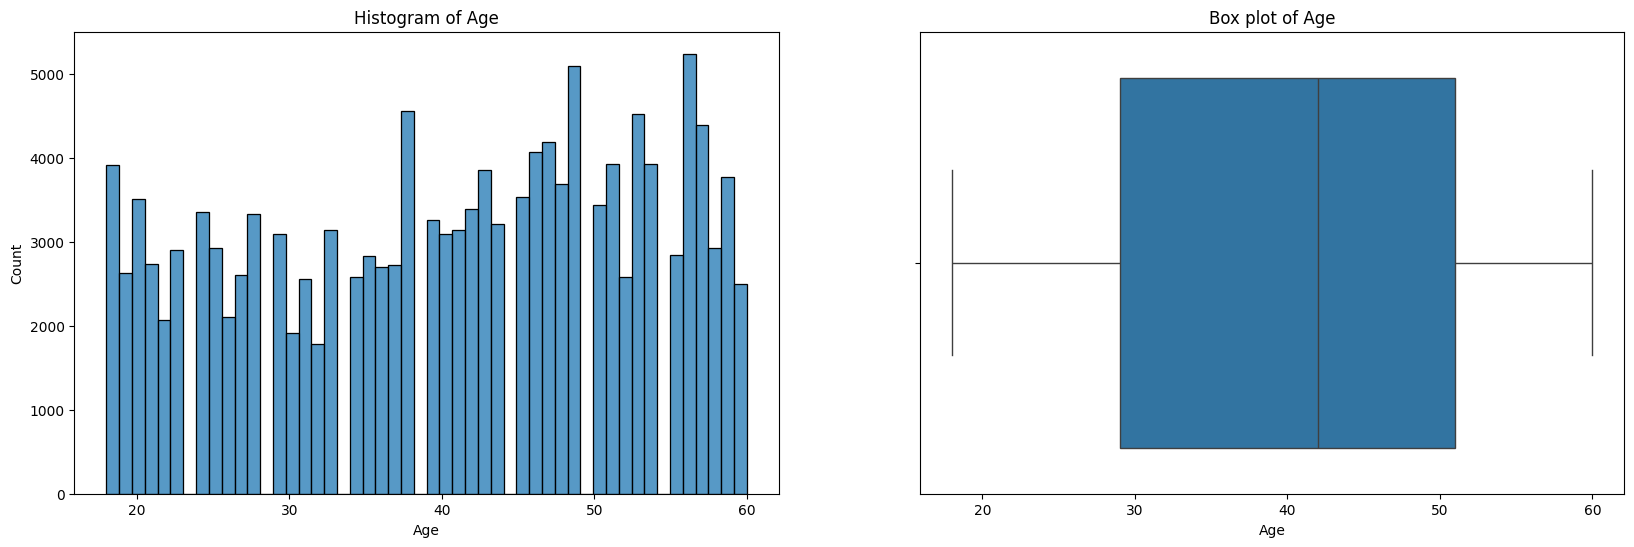

In [11]:
plot_numerical(data, 'Age')

#### Insights
- **Histogram:**
    - The age distribution is relatively uniform across different age groups, with some fluctuations
    - Ages between 18 and 60 appear to be well-represented, with no extreme peaks or valleys, suggesting a diverse range of ages in the dataset
    - There is a slightly higher frequency of individuals around the ages of 50 and 20, as shown by peaks around these values
    - The histogram indicates a broad age range, covering both young adults and older adults, which could add valuable diversity to the dataset
- **Box Plot:**
    - The box plot shows a median age around the early 40s, indicating that half of the population is younger than this age and half is older
    - The interquartile range (IQR), representing the middle 50% of the data, is spread between roughly 30 and 50 years, suggesting a concentration of individuals in this age range
    - There are no apparent outliers beyond the whiskers, indicating that the age distribution is well-contained within the observed range of 18 to 60

#### CGPA

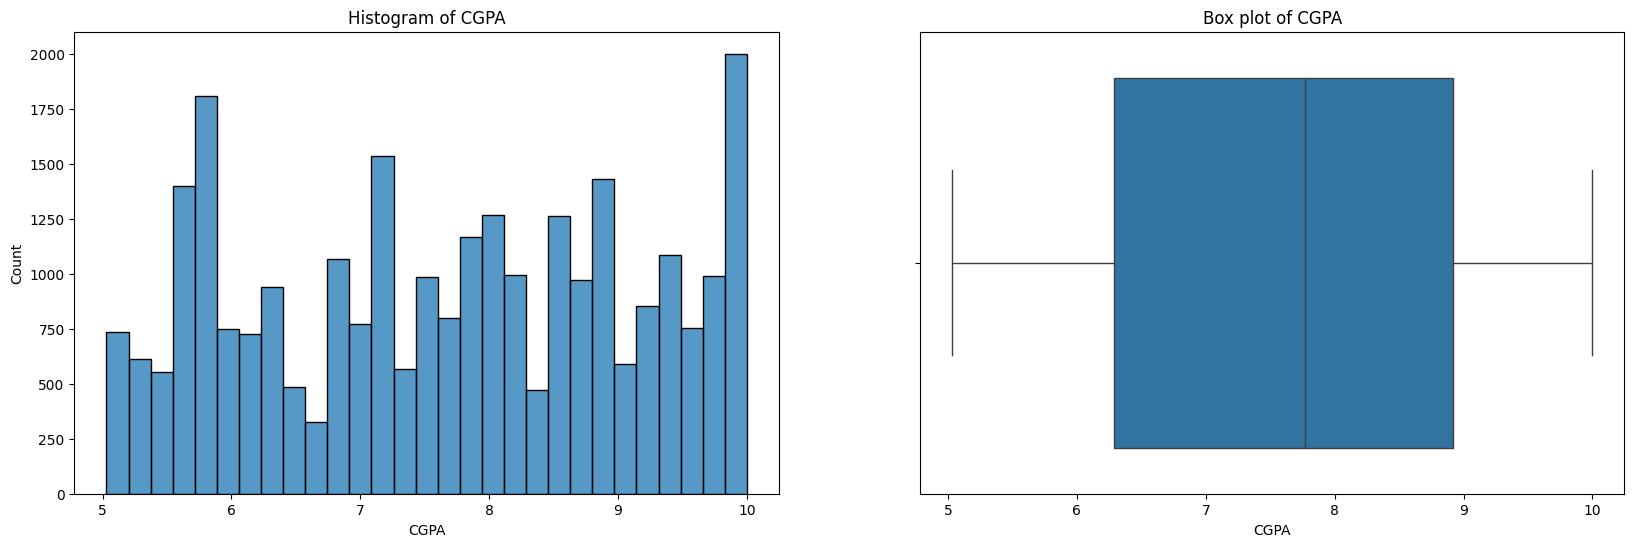

In [12]:
plot_numerical(data, 'CGPA')

**Insights:**
- **Histogram:**
    - The CGPA distribution is relatively spread across the range from 5.0 to 10.0, indicating diversity in academic performance
    - There are noticeable peaks around CGPA values of 5.5, 7.5, and 10.0, suggesting that a significant number of students cluster around these scores
    - The highest peak is observed at CGPA 10.0, which may indicate a portion of students achieving top academic scores, possibly due to a grading cap
    - The histogram reflects a broad distribution of CGPA, with no extreme skewness, though slightly more students achieve high scores around 9-10
- **Box Plot:**
    - The median CGPA lies around 7.8, indicating that half of the students score below and half above this value
    - The interquartile range (IQR) spans from approximately 6.3 to 8.9, representing the middle 50% of CGPA scores, suggesting that the majority of students have mid-to-high academic performance
    - The whiskers indicate a well-contained distribution, with CGPA values ranging from about 5.0 to 10.0, and no apparent outliers.

### Gender

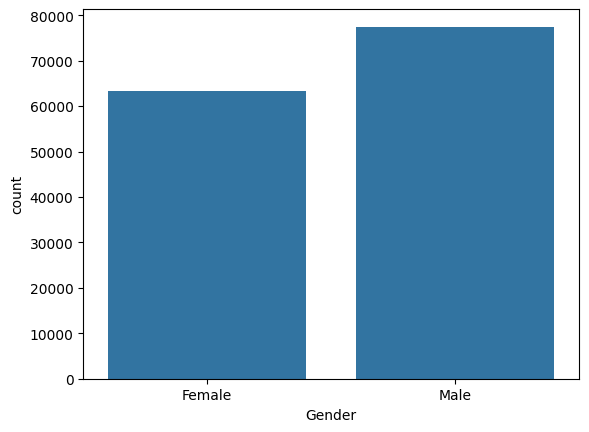

<Figure size 1000x600 with 0 Axes>

In [13]:
plot_categorical(data, 'Gender')

#### Insights:
- The Gender attribute has two categories: Male and Female
- Males are more frequent than females in this dataset, with a count noticeably higher than that of females. This indicates a gender imbalance, with males constituting the larger proportion

#### City

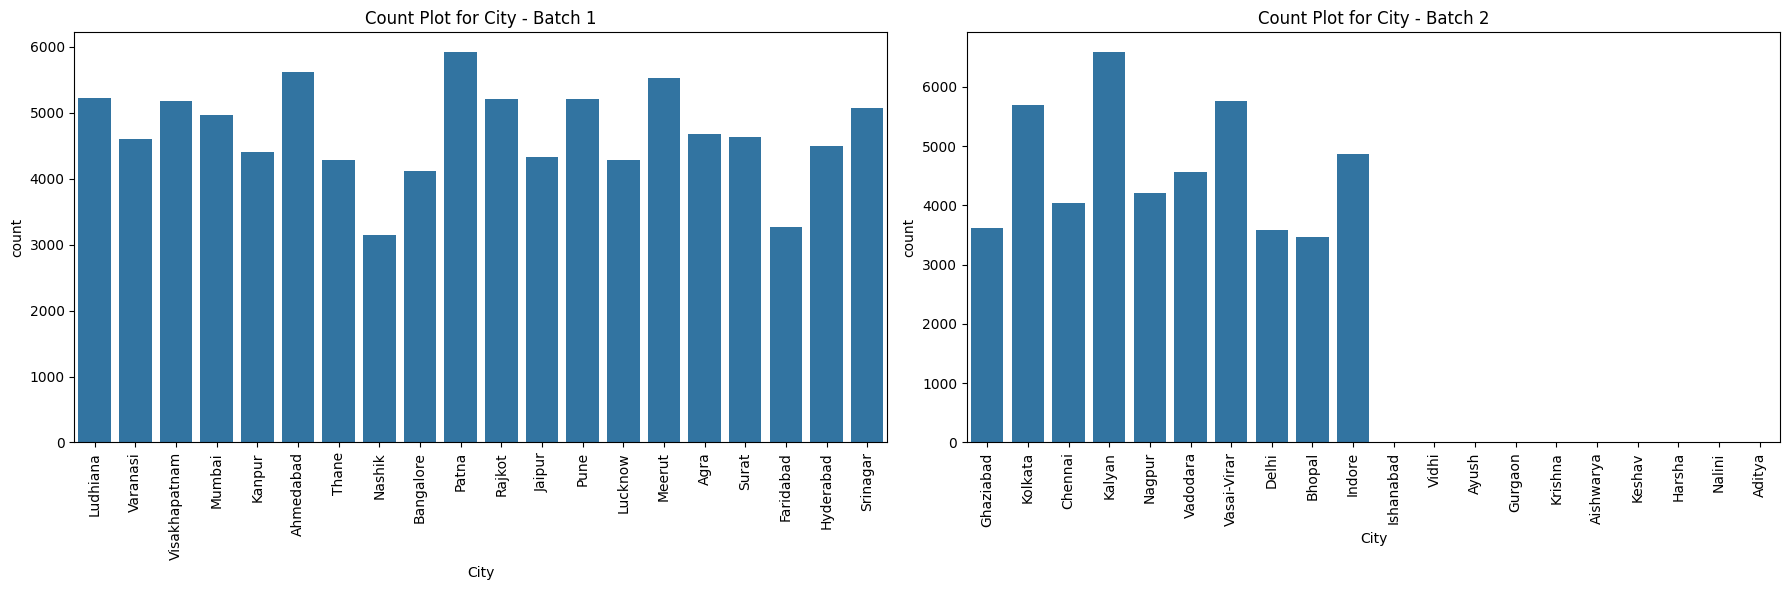

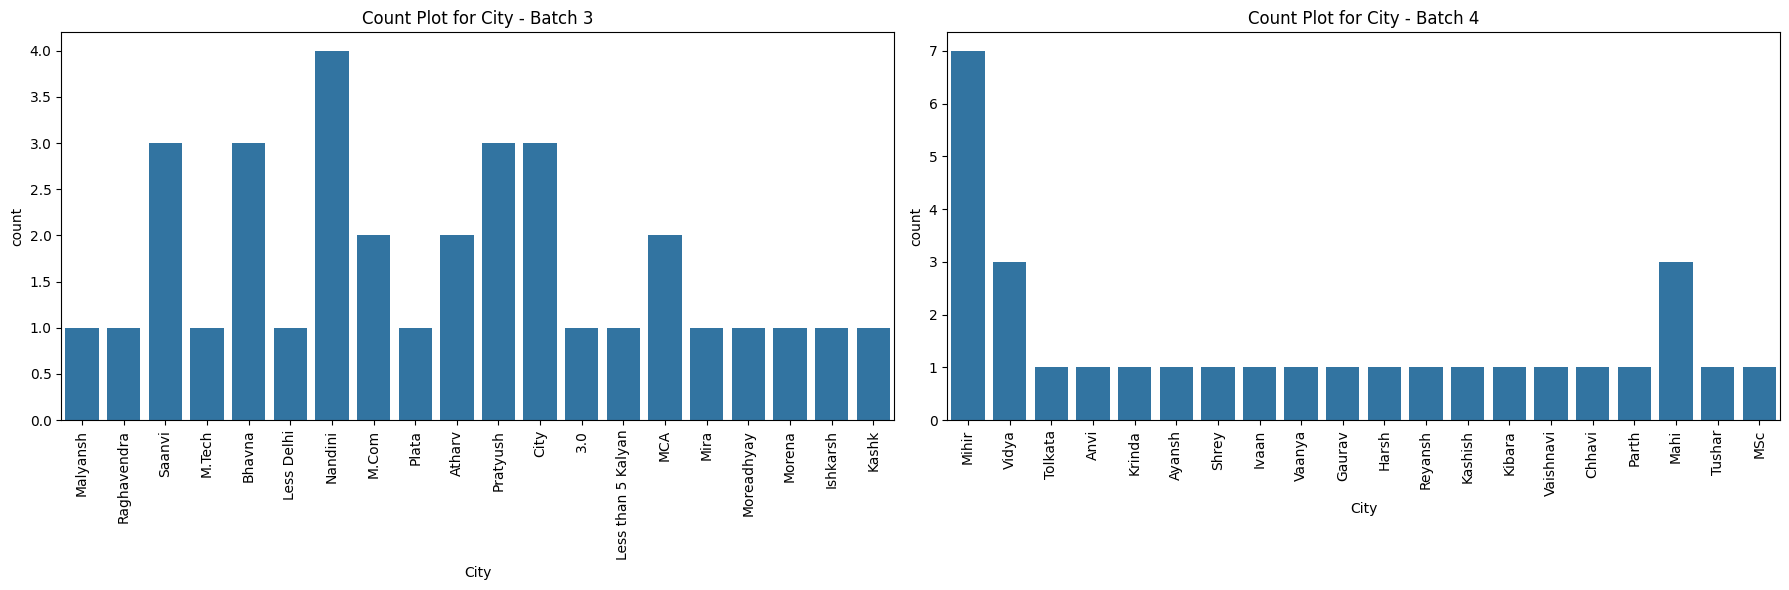

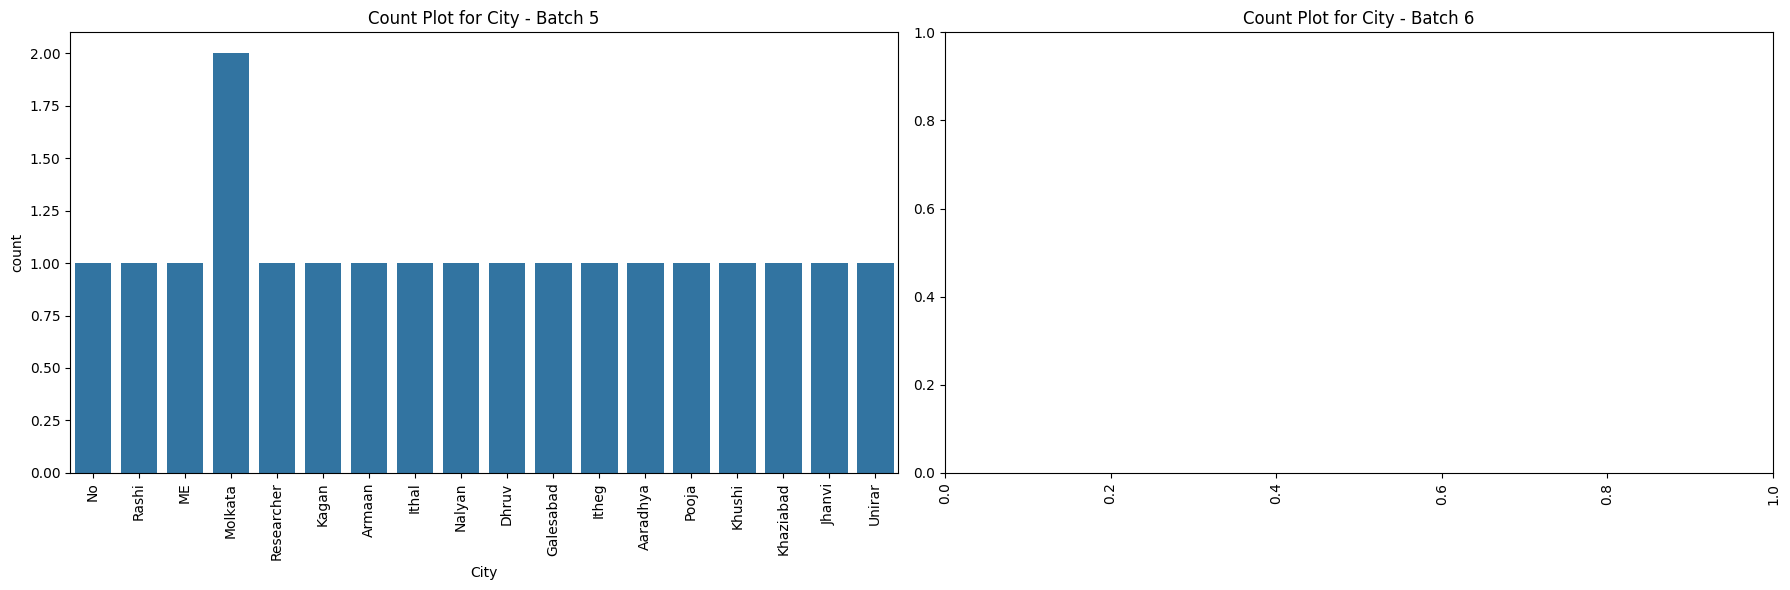

In [14]:
plot_categorical(data, 'City')

**Insights:**
- Certain cities, such as Kalyan, Patna, and Ahmedabad, have high counts, consistently appearing across batches with relatively large frequencies (above 5,000). This suggests these are major cities with a significant representation in the dataset
- Cities like Chennai, Ghaziabad, and Bhopal have moderate counts, generally between 2,000 to 4,000. These cities are well-represented, though less so than the highest-count cities, indicating a balanced distribution across different urban areas
- Not all entries in the City attribute appear to represent actual city names. In Batches 4 and 5, some entries stand out as potentially non-city labels. For instance, terms like "Msc", "No", "ME", and "Pooja" do not resemble typical city names and may represent abbreviations, administrative regions, or other non-standard labels

#### Working Professional or Student

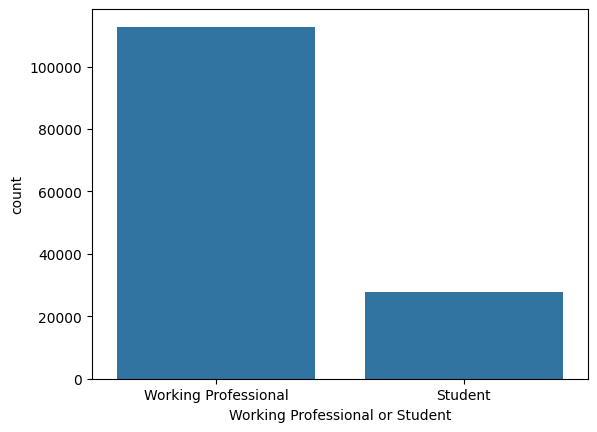

<Figure size 1000x600 with 0 Axes>

In [18]:
plot_categorical(data, 'Working Professional or Student')

**Insights:**
- The Working Professional or Student attribute consists of two categories: Working Professional and Student
- Working Professionals dominate this attribute, with a significantly higher count than Students. The count for working professionals exceeds 100,000, whereas the student count is much lower, likely around 25,000 to 30,000
- This distribution aligns with the dataset composition of approximately 80% working professionals and 20% students

#### Study Satisfaction

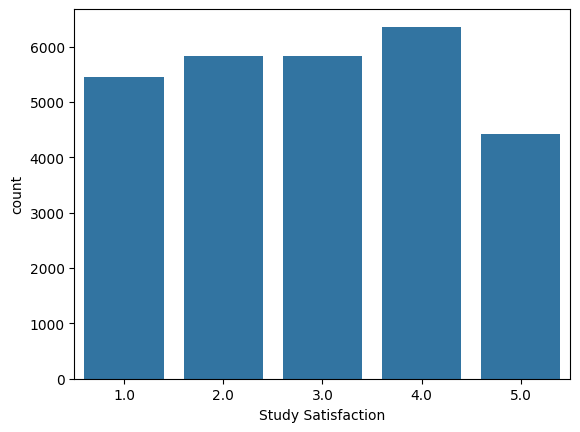

<Figure size 1000x600 with 0 Axes>

In [19]:
plot_categorical(data, 'Study Satisfaction')

#### Insights:
- The Study Satisfaction attribute includes five levels of satisfaction, ranging from 1 (lowest) to 5 (highest)
- Satisfaction levels 2, 3, and 4 have the highest counts, with each around 6,000 entries, indicating that most students report moderate to high satisfaction with their studies
- Levels 1 and 5 show lower frequencies, suggesting that fewer students experience extreme levels of study satisfaction, whether very low or very high

#### Job Satisfaction

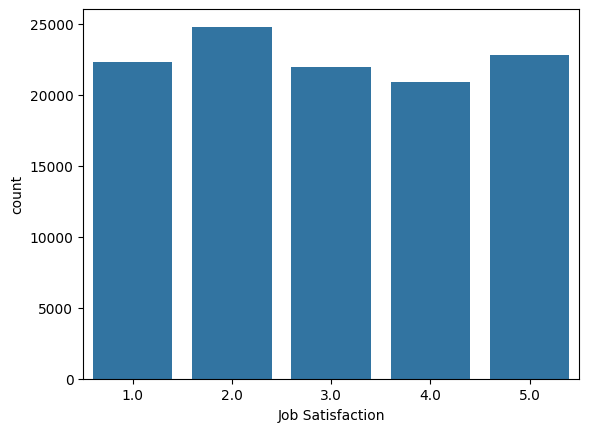

<Figure size 1000x600 with 0 Axes>

In [20]:
plot_categorical(data, 'Job Satisfaction')

#### Insights:
- The Job Satisfaction attribute includes five levels, from 1 (lowest) to 5 (highest)
- Level 2 has the highest count, with slightly over 25,000 entries, suggesting that a notable portion of individuals report low job satisfaction
- Levels 1, 3, 4, and 5 are relatively balanced, each with counts close to or slightly above 20,000. This indicates a fairly even distribution across different satisfaction levels, with a slight skew toward lower satisfaction

#### Academic Pressure

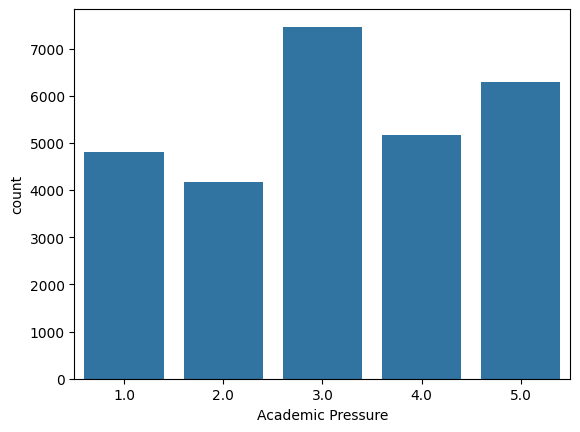

<Figure size 1000x600 with 0 Axes>

In [21]:
plot_categorical(data, 'Academic Pressure')

#### Insights:
- The Academic Pressure attribute includes five levels, from 1 (low pressure) to 5 (high pressure)
- Level 3 has the highest count, with over 7,000 entries, indicating that moderate academic pressure is the most common experience among students
- Levels 1, 4, and 5 have relatively similar counts, with each around 4,800 to slightly over 6,000, showing a balanced spread across low to high academic pressure
- Level 2 has the lowest count, suggesting that slightly low academic pressure is less common compared to other levels

#### Work Pressure

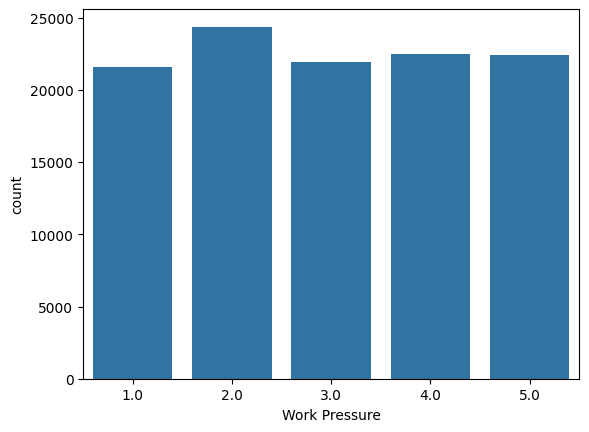

<Figure size 1000x600 with 0 Axes>

In [22]:
plot_categorical(data, 'Work Pressure')

#### Insights:
- The Work Pressure attribute includes five levels, from 1 (low pressure) to 5 (high pressure)
- Level 2 has the highest count, slightly exceeding 23,000, indicating that a substantial portion of individuals experience moderate work pressure
- Levels 1, 3, 4, and 5 each have counts around 20,000 to 23,000, showing a balanced distribution across different levels of work pressure

#### Profession

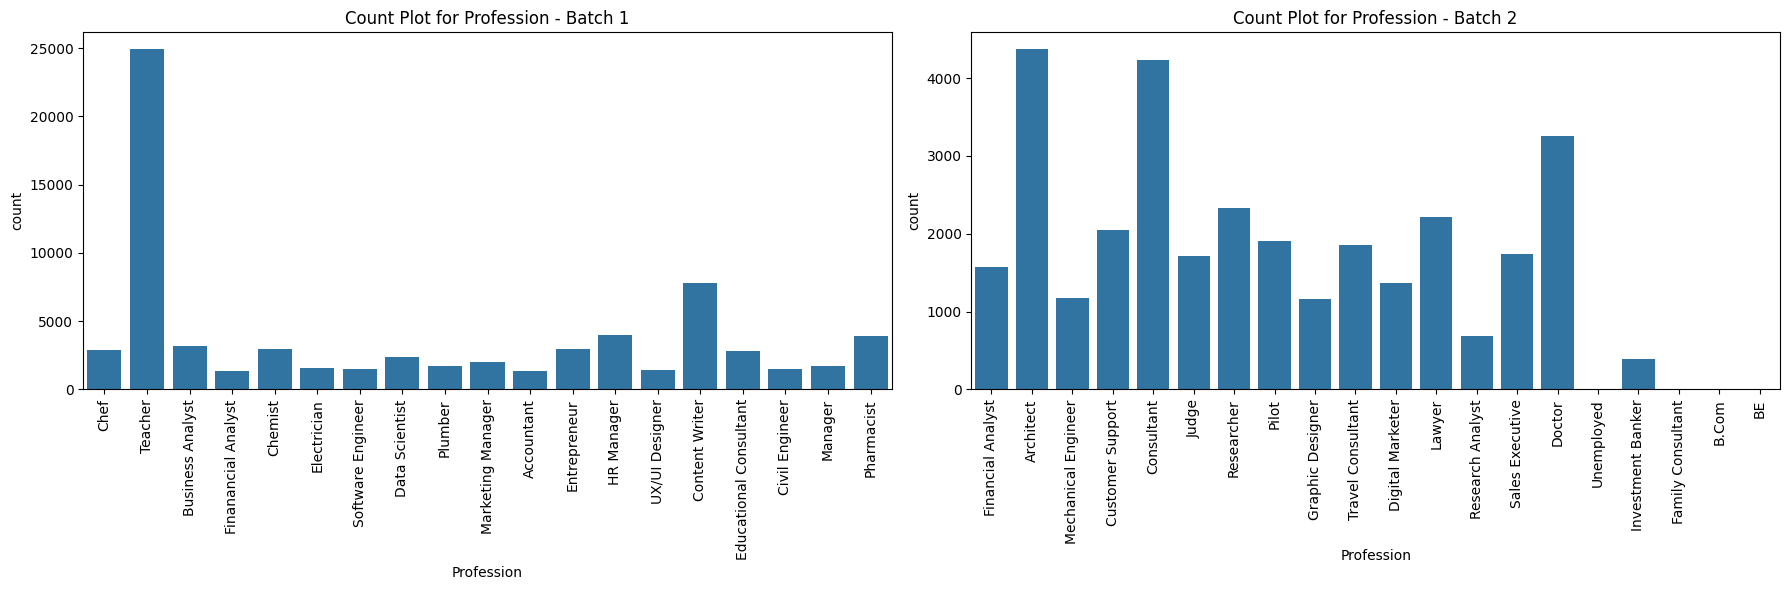

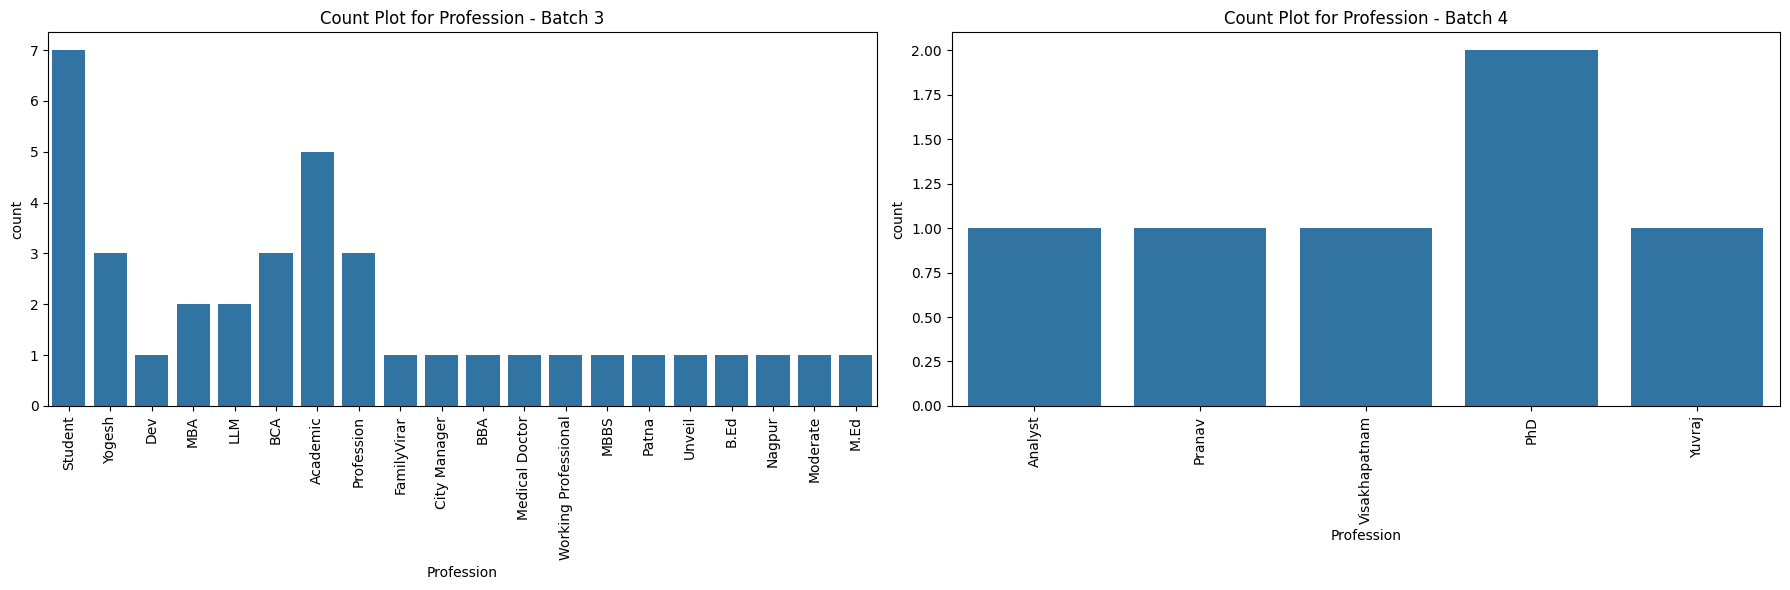

In [23]:
plot_categorical(data, 'Profession')

#### Insights:
- The dataset has a significant imbalance, with certain professions (like Teachers) being heavily represented, while many others have minimal representation
- The presence of non-professional labels, such as names or degrees, suggests inconsistencies in the Profession attribute
- Despite some anomalies, the dataset includes a broad range of professional roles, covering fields like education, finance, engineering, healthcare, and design

#### Sleep Duration

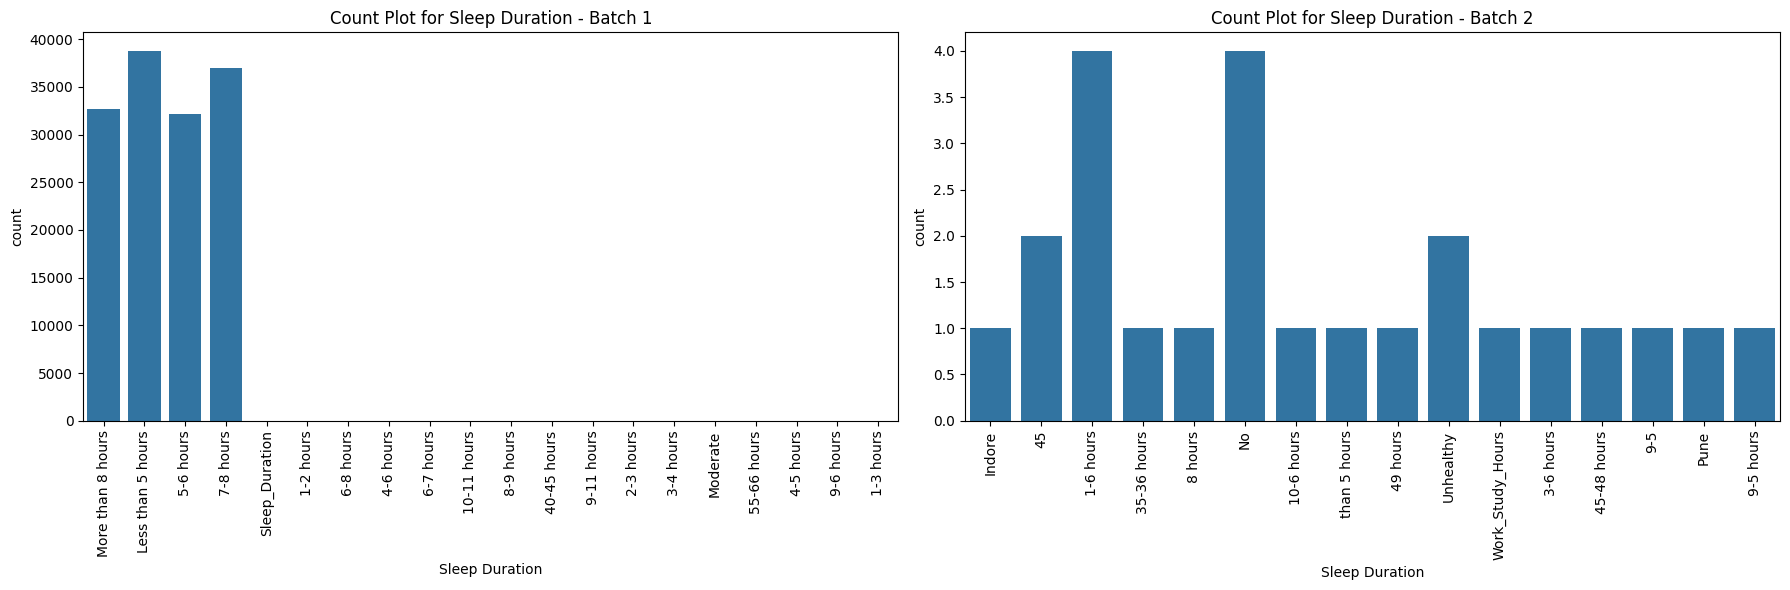

In [24]:
plot_categorical(data, 'Sleep Duration')

#### Insights:
- Batch 1 shows a trend toward shorter sleep durations (less than or equal to 8 hours) among most individuals. This trend could indicate a high prevalence of sleep deprivation, which may have implications for mental health
- The presence of non-sleep-related entries (e.g., city names, terms like Unhealthy, Work_Study_Hours) points to data quality issues within the Sleep Duration attribute.
- While Batch 1 has a clear concentration on typical sleep ranges (less than 8 hours), Batch 2 shows unusual ranges (e.g., 1-6 hours, 45 hours) and non-standard entries, making direct comparisons difficult

#### Dietary Habits

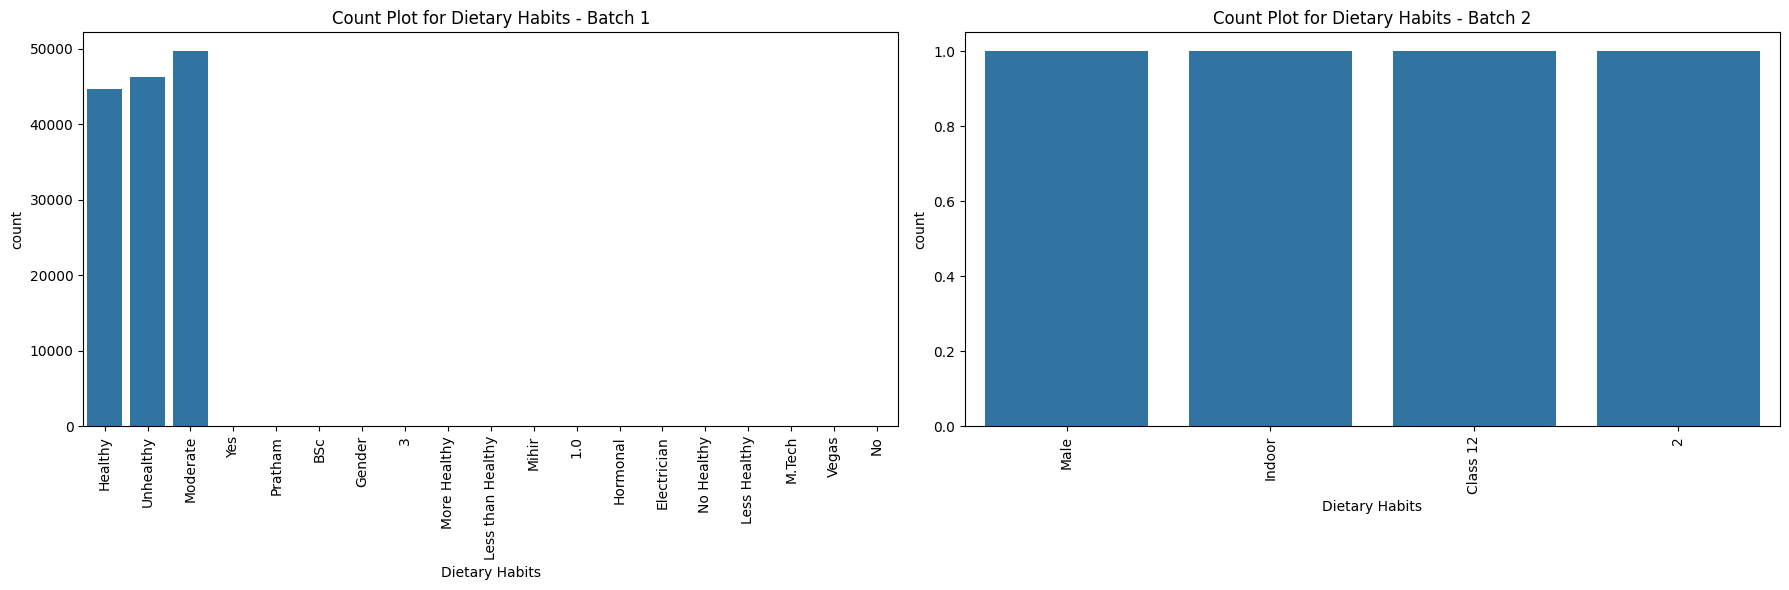

In [25]:
plot_categorical(data, 'Dietary Habits')

#### Insights:
- The responses primarily fall into Healthy, Unhealthy, and Moderate dietary habits, suggesting these are the main categories for the population
- The inclusion of non-dietary-related entries (e.g., professions, educational qualifications) indicates data entry errors that need correction
- Despite the presence of errors, the main dietary habits (Healthy, Unhealthy, and Moderate) still dominate, suggesting that these are likely accurate representations of the participants' dietary choices.

#### Degree

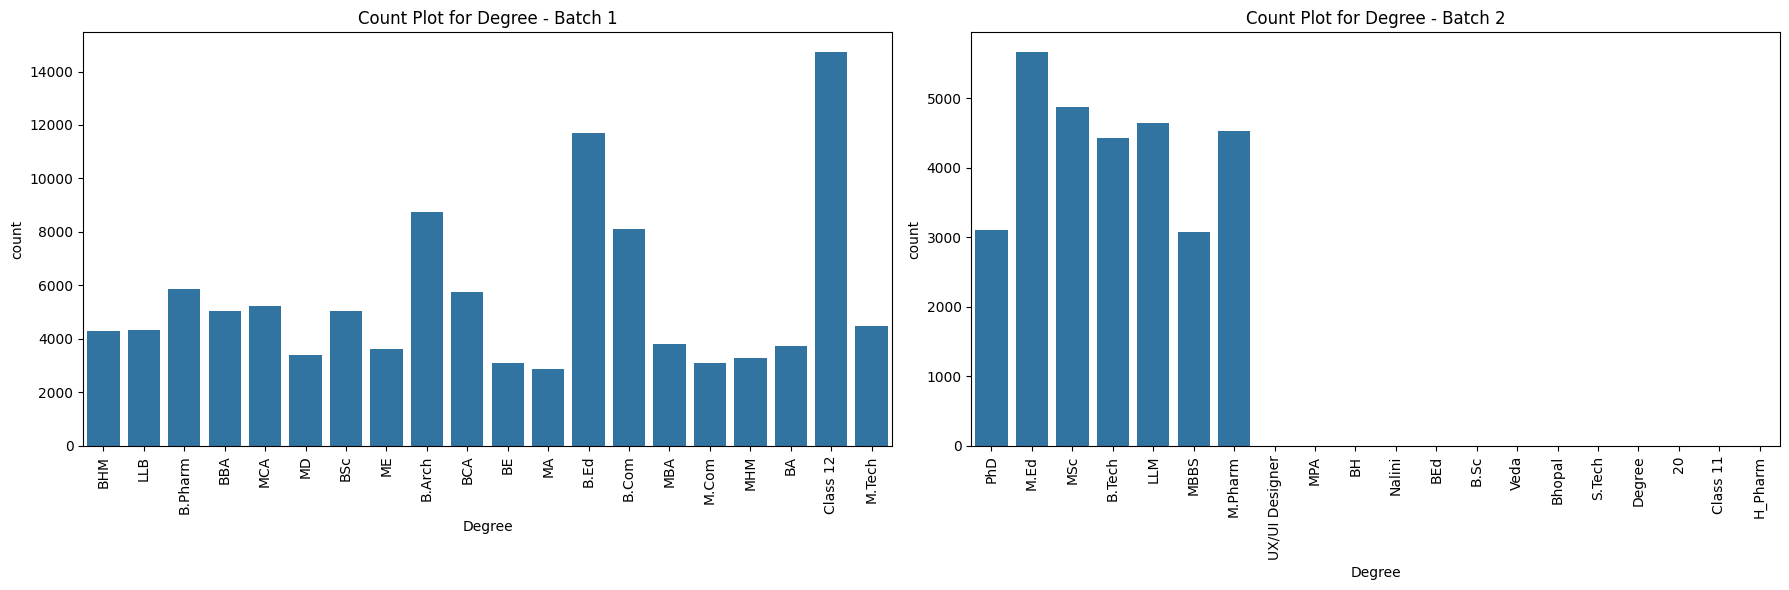

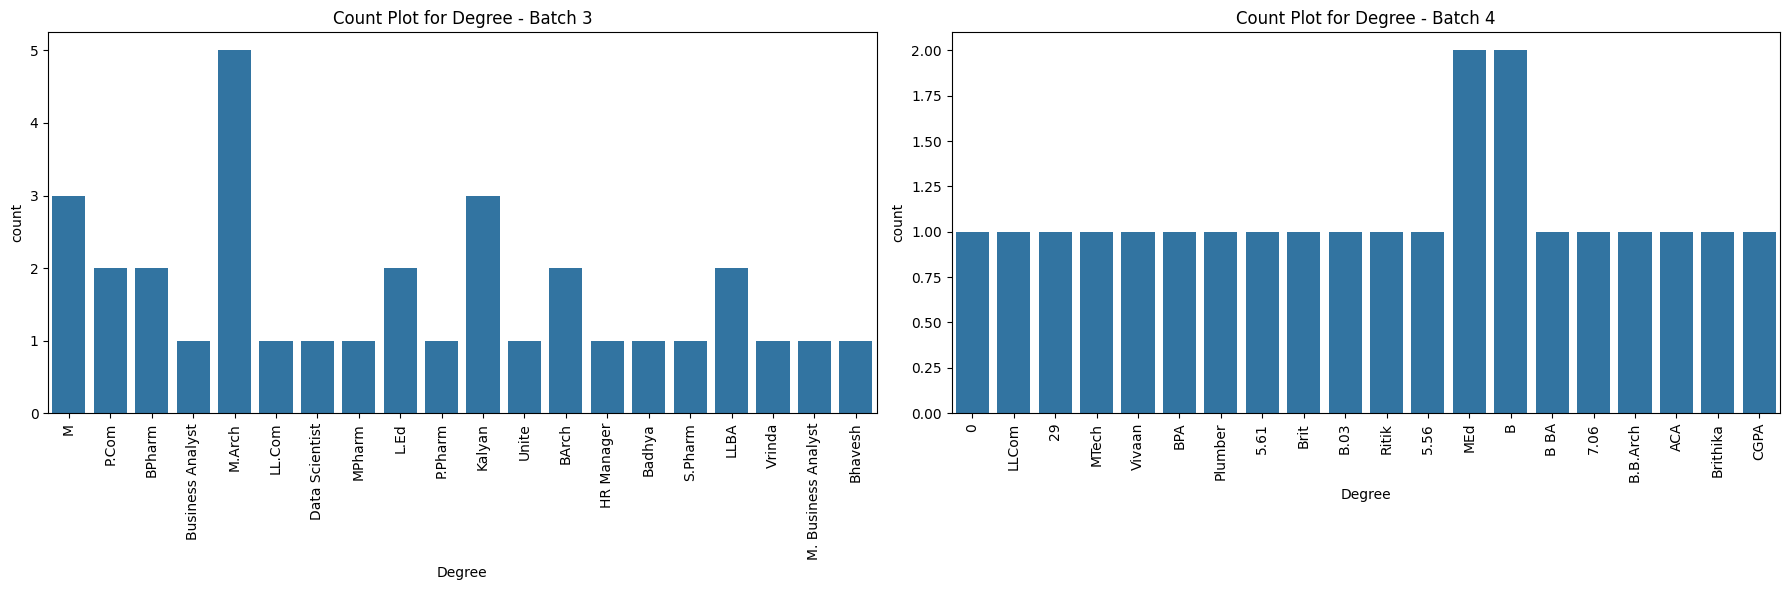

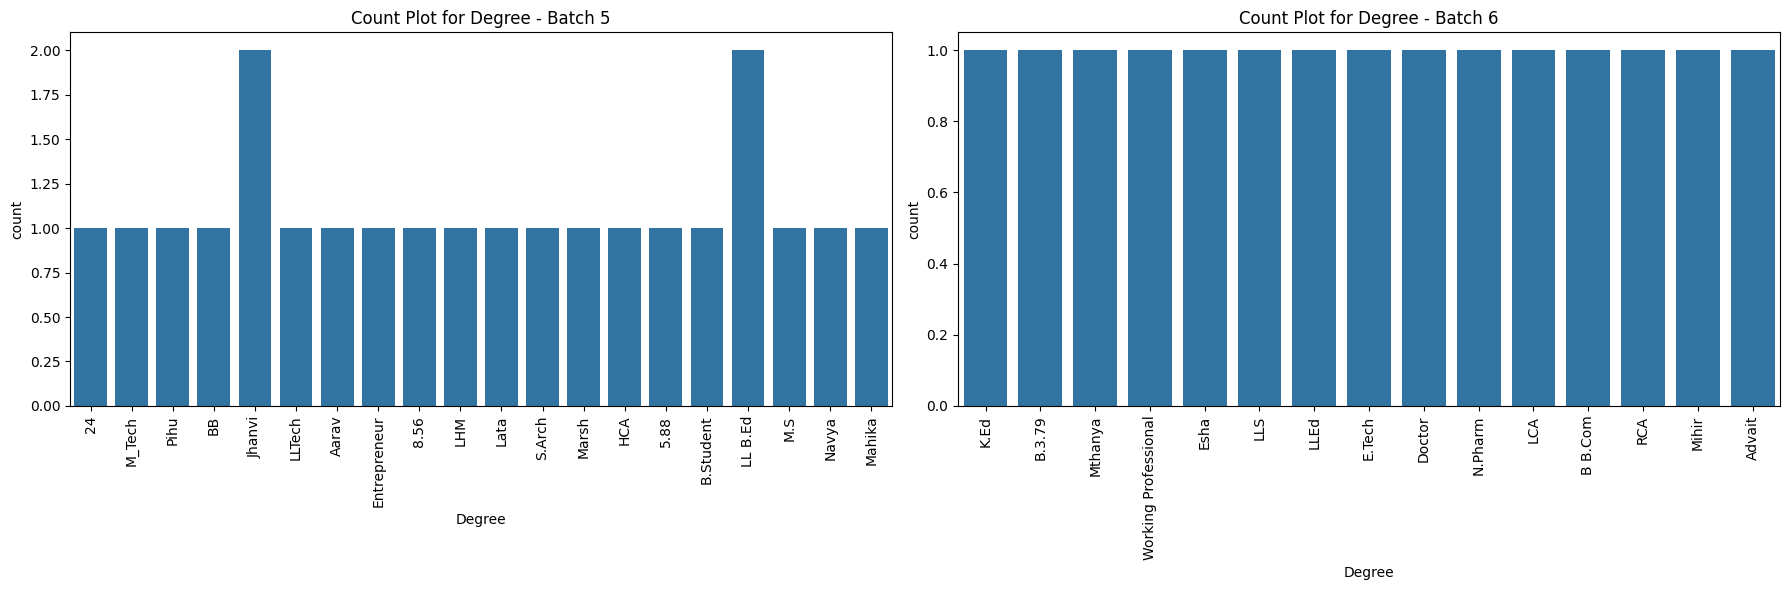

In [26]:
plot_categorical(data, 'Degree')

#### Insights:
- Class 12, B.Ed, B.Arch, MBA, and MCA are among the most frequently mentioned degrees, representing high school graduates, common undergraduate fields, and advanced degrees
- The presence of irrelevant entries across multiple batches suggests a need for data cleaning to improve the quality of the Degree attribute
- The dataset shows a range of educational levels, from high school diplomas to advanced degrees, reflecting a diverse population in terms of educational background

#### Financial Stress

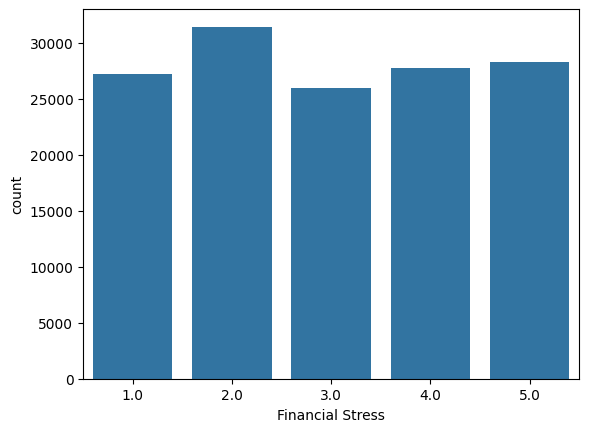

<Figure size 1000x600 with 0 Axes>

In [27]:
plot_categorical(data, 'Financial Stress')

#### Insights:
- The data points are relatively evenly distributed across the financial stress levels, with only minor differences in count between levels
- Level 2 (second-lowest stress) has the highest count, exceeding 30,000, suggesting that a significant portion of respondents experience mild financial stress
- Levels 1, 3, 4, and 5 are close in count, each around 25,000 to 30,000, indicating that financial stress is spread relatively uniformly across these categories
- There isn’t a single dominating level of financial stress, which implies a balanced spread of financial stress perceptions among the respondents

#### Had Suicidal Thoughts?

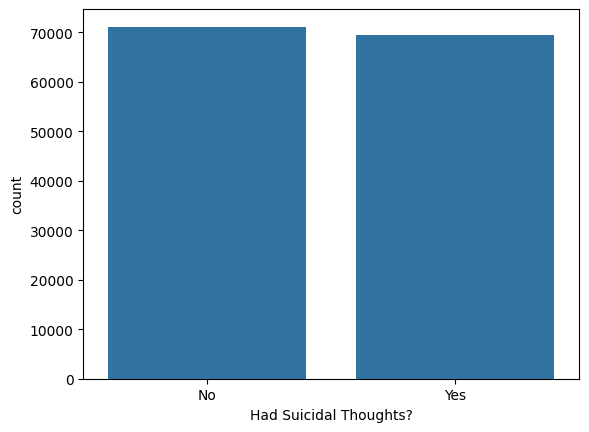

<Figure size 1000x600 with 0 Axes>

In [28]:
plot_categorical(data, 'Had Suicidal Thoughts?')

**Insights:**
- The counts for "Yes" and "No" are nearly identical, suggesting a balanced representation in this dataset
- The balance between "Yes" and "No" responses allows for a more thorough analysis of factors associated with suicidal thoughts

#### Family History of Mental Illness

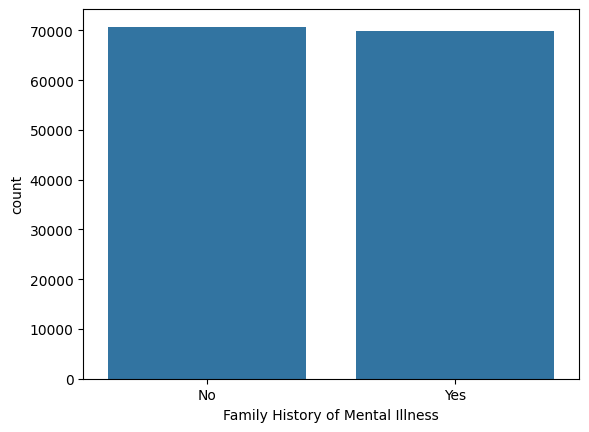

<Figure size 1000x600 with 0 Axes>

In [29]:
plot_categorical(data, 'Family History of Mental Illness')

#### Insights:
- The almost equal count for "Yes" and "No" responses indicates a balanced representation
- With a near-equal distribution, this attribute allows for a fair comparison between individuals with and without a family history of mental illness

#### Depression

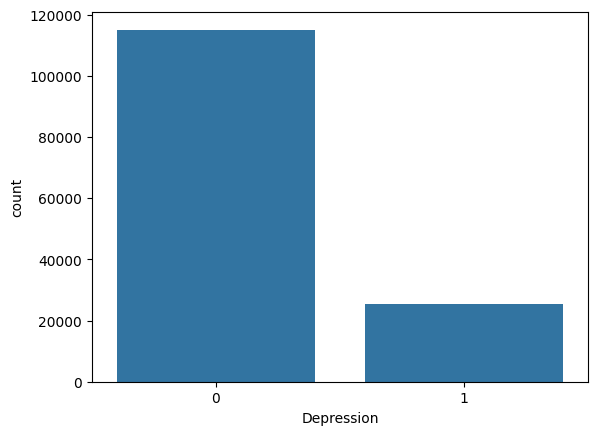

<Figure size 1000x600 with 0 Axes>

In [30]:
plot_categorical(data, 'Depression')

#### Insights:
- There is a large skew toward individuals without depression
- This imbalance could reflect real-world trends where the prevalence of diagnosed depression is lower compared to those without diagnosed depression. However, it is crucial to examine whether this is representative of the target population for meaningful insights